In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from PIL import Image, ImageFilter, ImageDraw
from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)


In [3]:
img = Image.open("circles-r2.jpg")
pixels = img.load()
width, height = img.width, img.height

In [4]:
output = Image.new("RGB", img.size)
draw = ImageDraw.Draw(output)

In [5]:
intensity = np.zeros((width, height))
for x in range(width):
    for y in range(height):
        intensity[x, y] = sum(pixels[x, y]) / 2

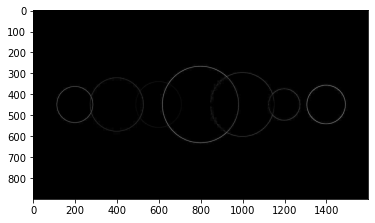

In [6]:
for x in range(1, img.width - 1):
    for y in range(1, img.height - 1):
        magx = intensity[x + 1, y] - intensity[x - 1, y]
        magy = intensity[x, y + 1] - intensity[x, y - 1]
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    
plt.imshow(output, cmap='gray')